In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

In [42]:
AGGREGATED_STATS = "aggregated_stats.csv"
AGGREGATED_RES = "aggregated_responses.csv"

In [43]:
stats_df = pd.read_csv(AGGREGATED_STATS)
res_df = pd.read_csv(AGGREGATED_RES)

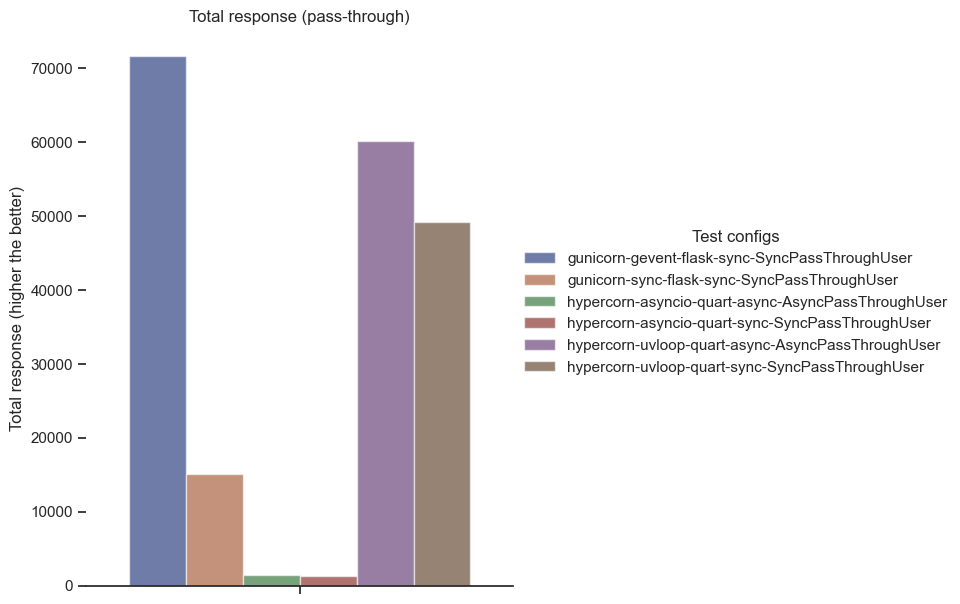

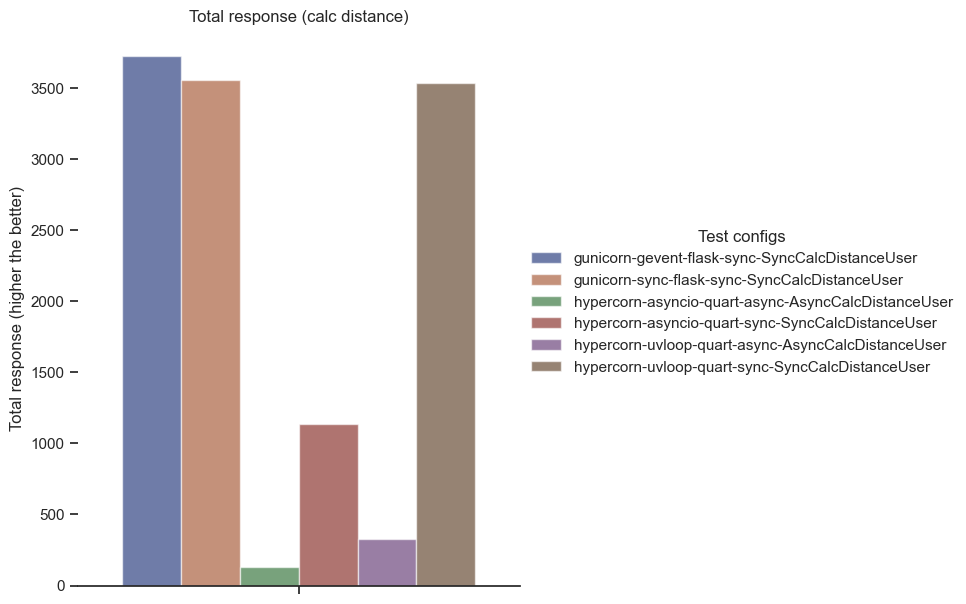

In [44]:
def chart_rsp(df: pd.DataFrame, title: str):
    g = sns.catplot(
        data=df, kind="bar",
        x=None, y="Request Count", hue="test_name",
        errorbar="sd", palette="dark", alpha=.6, height=6
    )

    g.despine(left=True)
    g.set_axis_labels("", "Total response (higher the better)")
    g.legend.set_title("Test configs")

    g.set(title=title)

    filename = f'charts/{"-".join(title.lower().split(" "))}.png'
    g.savefig(filename)


chart_rsp(stats_df[stats_df["test_name"].str.endswith("PassThroughUser")], "Total response (pass-through)")
chart_rsp(stats_df[stats_df["test_name"].str.endswith("CalcDistanceUser")], "Total response (calc distance)")

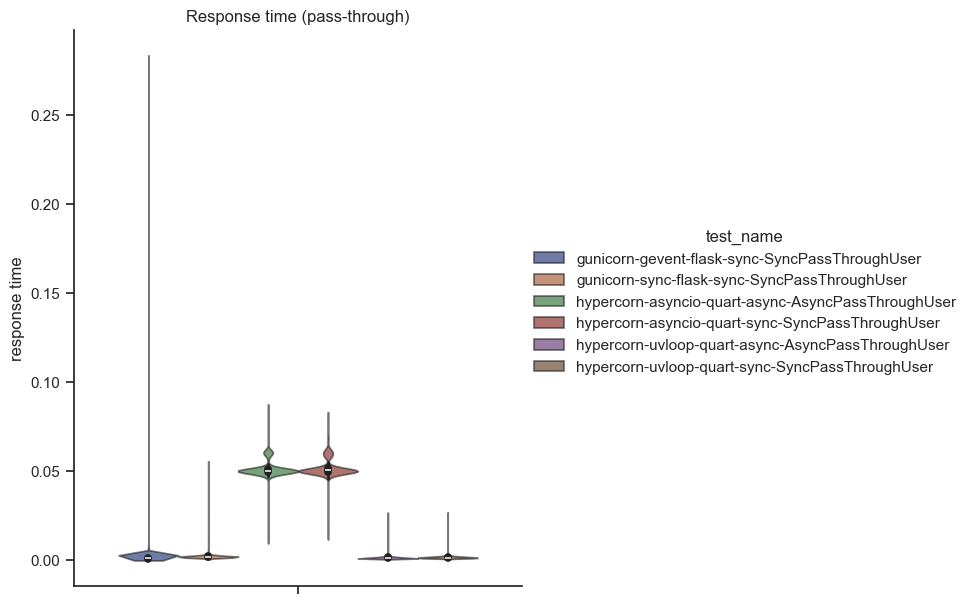

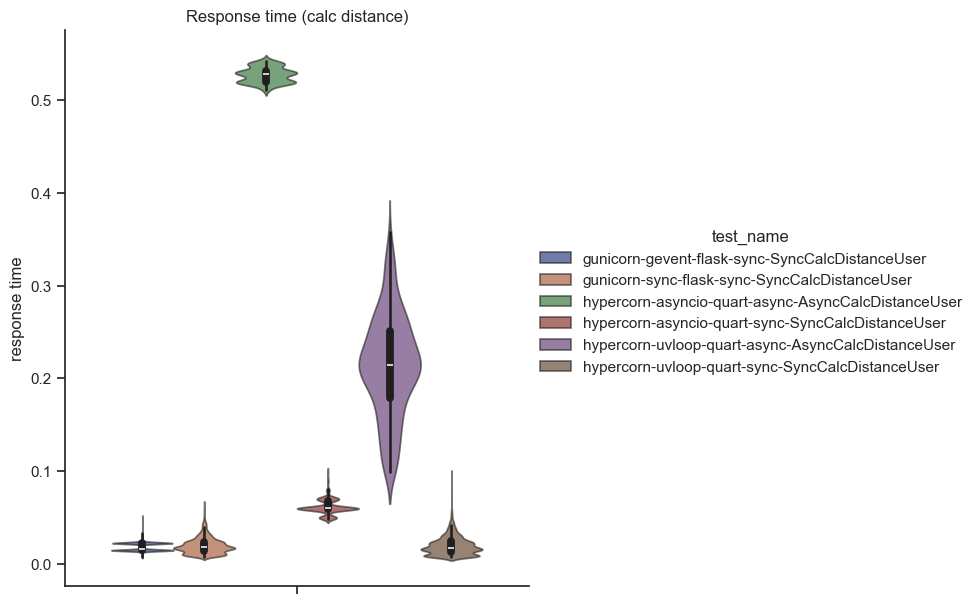

In [45]:
def chart_violin(df: pd.DataFrame, title: str):
    g = sns.catplot(
        data=df, kind="violin",
        x=None, y="response time", hue="test_name",
        errorbar="sd", palette="dark", alpha=.6, height=6
    )
    g.set(title=title)

    filename = f'charts/{"-".join(title.lower().split(" "))}.png'
    g.savefig(filename)


chart_violin(res_df[res_df["test_name"].str.endswith("PassThroughUser")], "Response time (pass-through)")
chart_violin(res_df[res_df["test_name"].str.endswith("CalcDistanceUser")], "Response time (calc distance)")